In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
model = KNeighborsClassifier(n_neighbors=1)

In [5]:
model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [6]:
y_model = model.predict(x)

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
accuracy_score(y, y_model)

1.0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.5)

In [12]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
y2_model = model.predict(x_test)

In [14]:
accuracy_score(y_test, y2_model)

0.9466666666666667

In [15]:
# cross validation: two fold cross validation
y2_model = model.fit(x_train, y_train).predict(x_test)
y1_model = model.fit(x_test, y_test).predict(x_train)
accuracy_score(y_test, y2_model), accuracy_score(y_train, y1_model)

(0.9466666666666667, 0.9333333333333333)

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(model, x, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [18]:
# leave-one-otcross
from sklearn.model_selection import LeaveOneOut

In [20]:
scores = cross_val_score(model, x, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
scores.mean()

0.96

In [22]:
# bias-variance trade off

In [23]:
# high bias and high variance

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [25]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [27]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

/home/diwaker/miniconda3/envs/pyml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/diwaker/miniconda3/envs/pyml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/diwaker/miniconda3/envs/pyml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


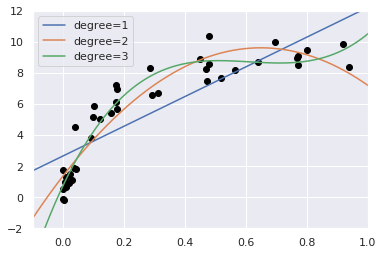

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()
for degree in [1, 2, 3]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f"degree={degree}")
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")

In [29]:
from sklearn.model_selection import validation_curve

Text(0, 0.5, 'score')

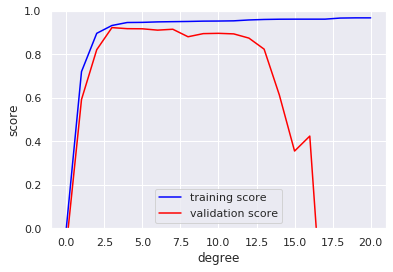

In [31]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         "polynomialfeatures__degree", degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

In [ ]:
""